<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Camilo Carvajal Reyes
- Nombre de alumno 2: Andrés González Fuentes


### **Link de repositorio de GitHub:** `https://github.com/camilocarvajalreyes/laboratorios-MDS7202`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
# !pip install --upgrade pandas
# !pip install xlrd
# !pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
# !pip install --upgrade plotly
# !pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

[video](https://www.youtube.com/watch?v=MW4d8_LLYp8)

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

```
- Invoice: Los datos son de tipo 'int' y corresponden a una variable categórica que sirve como ID de un recibo.
- StockDode: Los datos son de tipo 'int' y corresponden a una variable categórica que sirve como ID de cada producto.
- Description: Los datos son de tipo 'str' y corresponden a la descripción de cada producto.
- Quantity: Los datos son de tipo 'int' y corresponden a la cantidad a comprar de cada producto.
- InvoiceDate: Los datos son de tipo 'datetime' y corresponden a la fecha en la que se emitió el recibo.
- Price: Los datos son de tipo 'float' y corresponden al valor del precio por la cantidad del producto a llevar.
- Customer ID: Los datos son de tipo 'float' y corresponden a una variable categórica que sirve como ID de cada cliente.
- Country: Los datos son de tipo 'str' y corresponden al país desde donde se realizó o emitió el recibo.
```

In [2]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> Respuesta: **Análisis univariable**: corresponde a estudiar una columna particular de manera aislada con estadísticas resumen y visualizaciones que permitan ver como distribuyen los datos.

<!---
**Análisis univariable**: un análisis univariado corresponde a estudiar una columna particular de los datos de manera aislada. Esto puede incluir estadísticas básicas como también visualizaciones que permitan ver entre que valores y de qué manera se distribuyen los datos.
-->

> **Análisis multivariable**: busca entender las relaciones entre pares de variables. Se exploran los patrones entre columnas, a través de correlaciones y tablas de contingencia.

<!---
**Análisis multivariable**: este tipo de exploraciones buscan entender las relaciones entre pares de variables. Típicamente se explora hasta que punto se observan patrones entre columnas, a través de correlaciones y tablas de contingencia.
-->

> **Datos faltantes**: en este análsis entendemos como distribuyen los datos nulos para generar una estrategia que permita tratarlos.

> Estos elementos nos permiten extraer un entendimiento de base acerca de los datos y generar las primeras hipótesis.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [4]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [5]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la serie Precio

    - Se observa que la mayoría de los productos en venta se concentran en precios relativamente bajos en comparación con el rango total de los datos. Hasta el tercer cuartil, estos llegan hasta 4.21. Sin embargo existen múltiples valores únicos con un alto precio que no se ven reflejados en el gráfico debido a que solo se toma una muestra del total. Estos valores toman efecto en la kurtosis y skewness que indica la presencia de una larga cola en la distribución (causa de estos puntos singulares).

In [6]:
profile_serie(df_retail['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

    Análisis de la serie Cantidad

    - Se observa que apesar del proceos de limpieza de datos, aún quedan outliers presentes que van de la mano al considerar la naturaleza de los datos, ya que no puede existir una cantidad negativa en un recibo, a no ser de un error. Estos outliers quedan presentes dado que la forma usada para elimnarnos responde a la distribución de los datos y no al hecho mencionado. Se observa también que hasta el tercer cuartil, la gente no suele llevar mas de 10 unidades de un determinado producto, y una cantidad considerablemente menor de veces, pueden llevar hasta 100 productos. Debido a los outliers aún presentes, el skewness es más positivo que para los precios. Por último, se tiene que la kurtosis indica que la cola de la distribución no se extiende de forma tan extensa como para los precios.

In [7]:
profile_serie(df_retail['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

    Análisis de la serie Fecha de recibo

    - Del gráfico se observan la cantidad de compras realizadas para deteminadas fechas, y se tiene que en general, no hay grandes diferencias a lo largo del año. Existe un leve descenso en las compras para entre los meses de enero a marzo, y una mayor concentración de compras para el período de navidad.

In [8]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

    Análisis de la serie País

    - Se destaca que casi la totalidad de las compras fueron realizadas en Reino Unido, quedando una muy mínima parte para Irlanda, Alemania, Francia, Países Bajos y para el resto de Europa, en el orden mencionado.

In [9]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

    Análisis de ID cliente

    - Se observa el conteo de cuantas veces se repite un cliente dentro del dataset, debido a aparecer una mayor cantidad de veces en recibos, ya sea por llevar más de un producto distinto en una misma instancia (fecha), o los mismos productos pero en distintas instancias. Una muy pequeña parte (24 de 4383) de clientes aparece con un conteo de más de 1000 compras. Mientras que para el resto, el número de compras pareciese disminuir lentamente.

In [10]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

    Análisis de la serie Descripción

    - Del gráfico se observa que la venta de los productos más vendidos disminuye (de izquierda a derecha) desde un gran valor rápidamente para los 10 primeros productos, para luego disminuir lentamente en el resto de los productos.

In [11]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

    Análisis de la serie Código de stock

    - Se observa que la variable StockCode y Description hacen referencia al mismo objeto, solo que una es la id y la otra su descripción, por lo que su distribución será la misma al igual que el análisis, realizado en el punto anterior.

In [12]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

    Análisis de serie Recibo

    - En el gráfico se observa la ocurrencia de cada recibo, en donde cada una implica que se añade otro producto dentro del mismo, es decir, será una boleta más larga. La forma en la que va disminuyendo la cantidad de productos en cada recibo, es aparentemente lineal, y se tienen pocos casos en los que las diferencias entre recibos es mayor, como las de los primeros.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [13]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

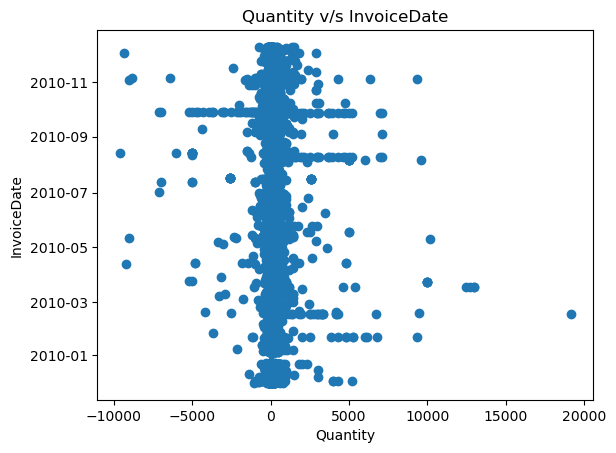

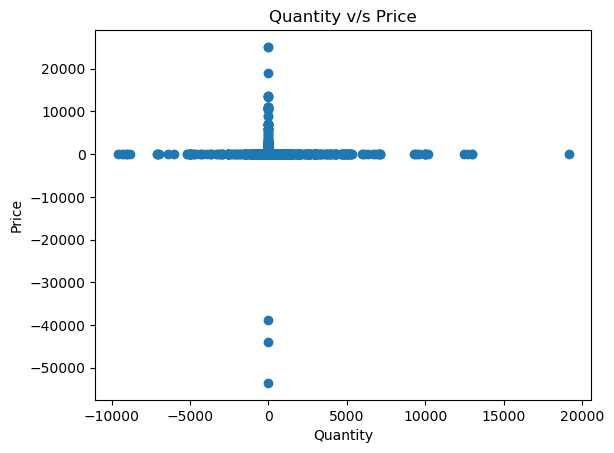

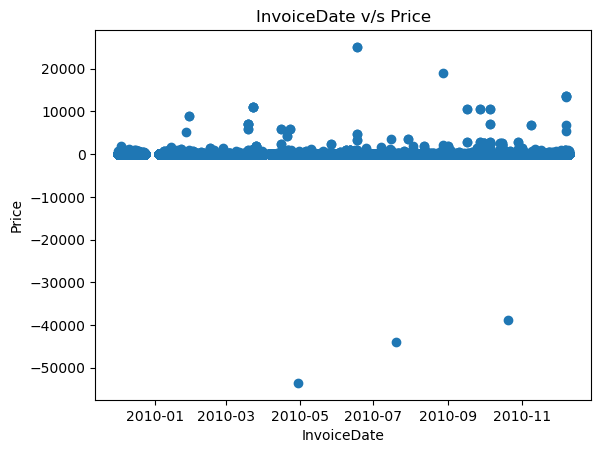

## Correlation:

## Missing Matrix:

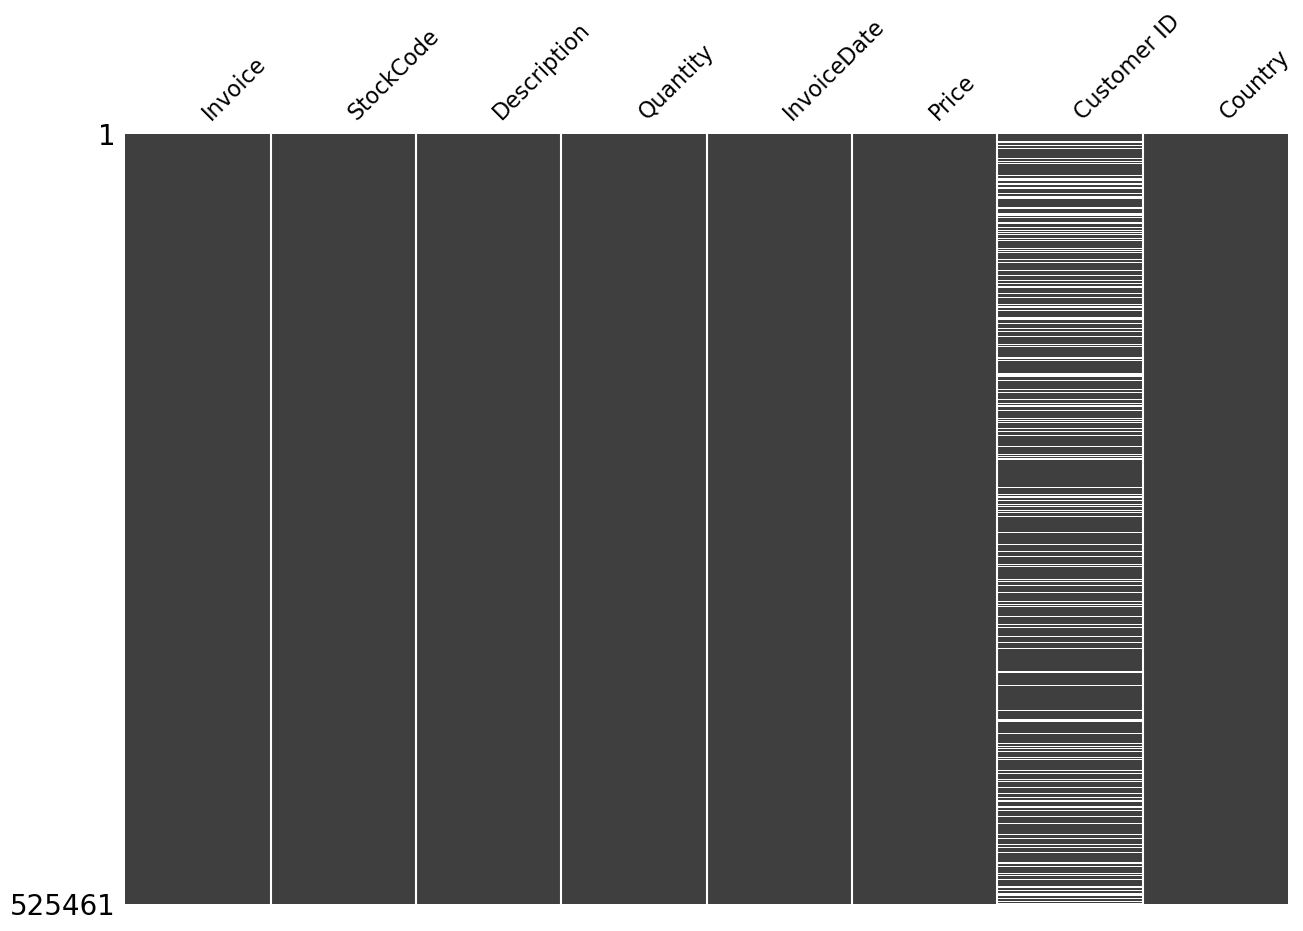

In [14]:
profile_df(df_retail)

    Respuesta
    - Quantity v/s InvoiceDate: Del gráfico se observa que a lo largo del año existe una tendencia hacia comprar una baja cantidad de productos. Sin embargo, podría ser un poco subestimado debido a que la escalada del eje x tiene su siguiente 'tick' en 5000. Se ven con claridad aquellas fechas con valores 'anómalos' en la cantidad a lo largo de todo el año, al ser valores negativos. Finalmente existen 4 fechas en las que hay presente varias compras con mayor cantidad de productos que la tendencia central, 2 fechas entre enero y marzo, y 2 fechas entre julio y noviembre
    
    - Quantity v/s Price: Del gráfico se observa que existe una proporcionalidad inversa entre una variable y otra. Es la correlación (negativa) entre variables más explícita y esto se explica de manera intuitiva ya que se tendrá más tendencia a comprar una mayor cantidad de productos baratos. De manera inversa, aquellos productos más caros tendran una menor demanda y por ende una menor cantidad de compras. Cabe señalar que para valores anómalos se observa lo siguiente: tenemos solo una compra por cada elemento con precio negativo. Por lo demás, aquellos elementos con cantidad de compras negativas parecen ser de bajo precio. 

    - InvoiceDate v/s Price: En general se tiene que no hay mucha variación de precio a lo largo del año. Solo existe una cantidad pequeña de puntos y un leve aumento de precios para los meses entre septiembre y noviembre. Existe un punto excepcionalmente mayor presente dentro de la temporada de verano (hemisferio norte), aproximadamente en el mes de junio.
    
    - Correlation: De la matriz de correlación, se tiene que no existe ninguna correlación entre las variables de 'Quantity' y 'Price', lo que podría indicar que los clientes son indiferentes a llevar una menor cantidad de algún producto a mayor valor de éste, o viceversa.

    - Missing Matrix: De la matriz se observa que la única columna con datos nulos es la de 'Customer ID', con una gran cantidad de éstos.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [15]:
df_retail.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [16]:
def limpieza(df_in):
    """Función de limpieza de datos para el dataframe"""
    df_out = df_in.copy(deep=True)
    # eliminando precios negativos
    df_out = df_out.drop(df_out[df_out.Price < 0].index)
    # eliminando cantidades negativas
    df_out = df_out.drop(df_out[df_out.Quantity < 0].index)
    return df_out

In [17]:
df_clean = limpieza(df_retail)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513132 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      513132 non-null  category      
 1   StockCode    513132 non-null  category      
 2   Description  513132 non-null  object        
 3   Quantity     513132 non-null  int64         
 4   InvoiceDate  513132 non-null  datetime64[ns]
 5   Price        513132 non-null  float64       
 6   Customer ID  407695 non-null  category      
 7   Country      513132 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 28.0+ MB


In [19]:
profile_serie(df_clean['Price']) 

## Price Profile

Type                            float64
Number of observations         513132.0
Mean                           4.239585
Std                            63.56784
Min                                 0.0
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                              1566
Zeros (%)                        0.31 %
Kurt                       61738.835225
Skew                          210.68695
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   512276
Duplicate rows (%)              99.83 %
Total size in memory      8210112 bytes
dtype: object

In [20]:
profile_serie(df_clean['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         513132.0
Mean                          11.715475
Std                           92.974904
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9645.549205
Skew                          80.347813
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   512968
Duplicate rows (%)              99.97 %
Total size in memory      8210112 bytes
dtype: object

In [21]:
profile_serie(df_clean['Description'])

## Description Profile

Type                                                  object
Number of observations                                513132
Unique                                                  4560
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3456
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        512942
Duplicate rows (%)                                   99.96 %
Total size in memory                           8210112 bytes
dtype: object

## Bivariant Analysis:

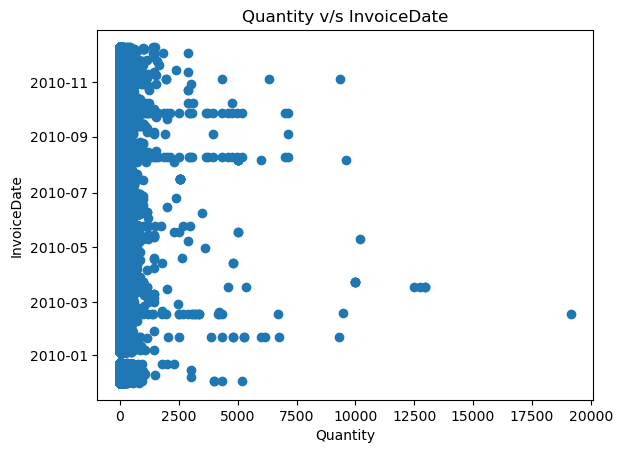

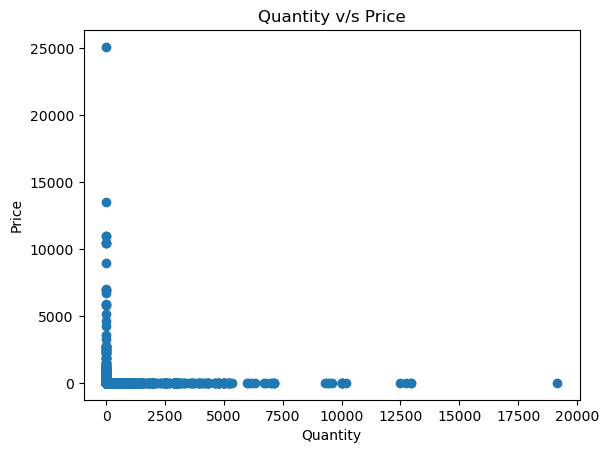

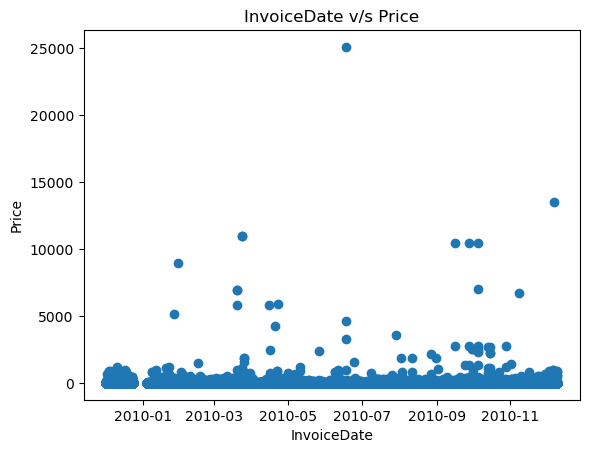

## Correlation:

## Missing Matrix:

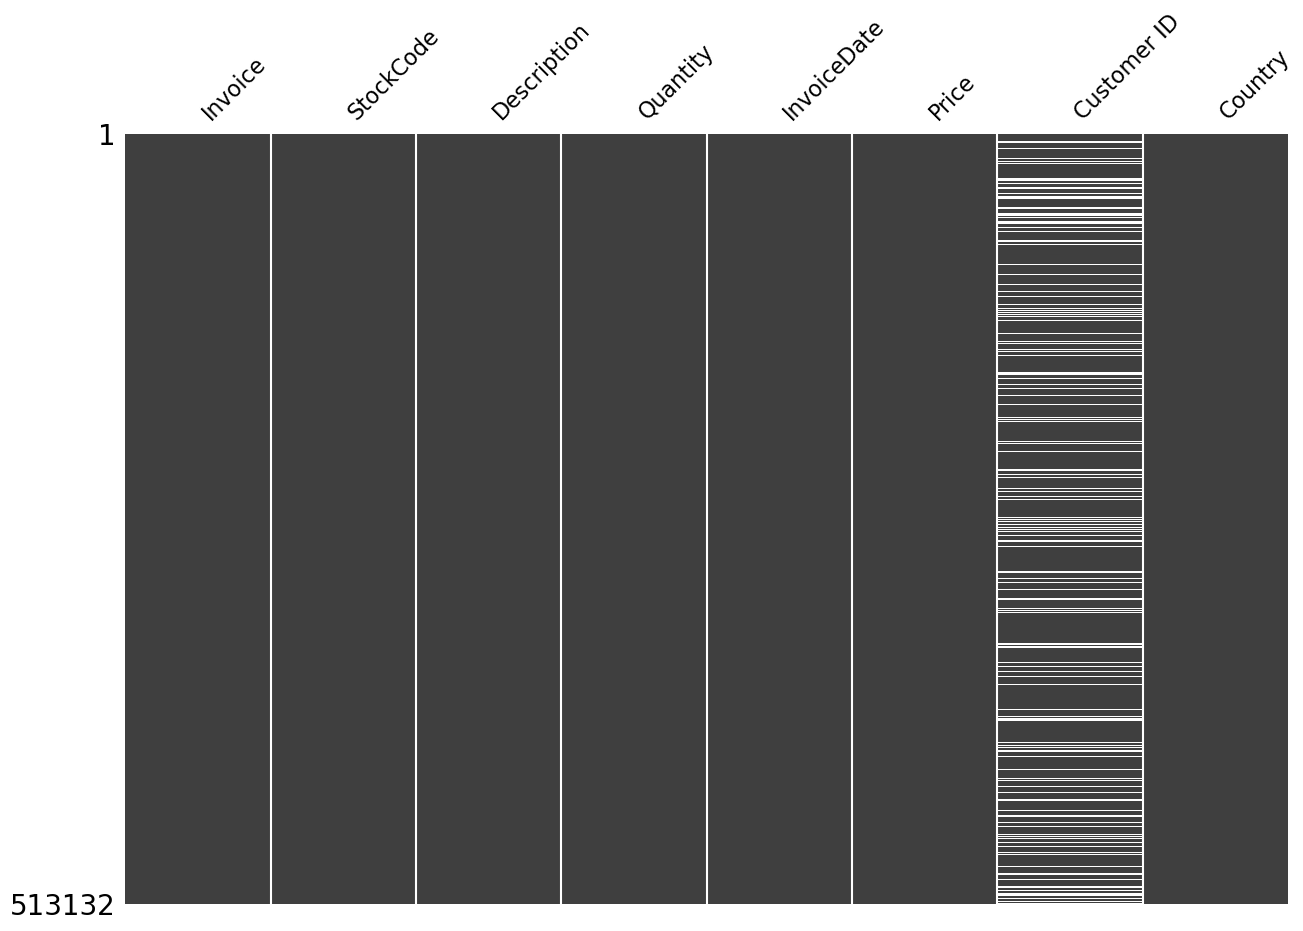

In [22]:
profile_df(df_clean)

**Respuesta**

    Por un lado los gráficos correspondientes al análisis univariado para la columna precio no muestra una diferencia tan grande, principalmente puesto que los valores erroneos de tal columnas eran pocos. Los histogramas muestran una ligera diferencia de forma, sin embargo los intervalos cambian (probablemente dados los valores eliminados por cantidades negativas), por ende no se puede hacer una comparación consistente al respecto.

    Para el gráfico de análisis univariado para cantidad si se observan diferencias significativas, ya que los valores errados eran 2.35% del dataset. Tanto con o sin outliers se ve claramente como se traslada tanto las barras como los boxplot.

    Es también explícito el cambio para el análisis bivariado. El dominio de todos los gráficos que comparan una variable con respecto a otra cambia. En particular, en el gráfico precio versus cantidad es claro como ya no se aprecia una cruz, sino solo la parte superior derecha de esto, como es de esperar. Los análisis sin embargo son similares a lo señalado en el punto anterior, ya que este se hizo considerando sobretodo aquellos valores no-anómalos.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [23]:
def TOP(df_in):
    # df = df_in[['Description']].copy(deep=True)
    ganancia = df_in.groupby(['Description']).Price.sum().nlargest(30)
    cantidad = df_in.groupby(['Description']).Quantity.sum().nlargest(30)

    fig1 = px.bar(ganancia,title='Top 30 productos por ganancia',labels={'value':'ganancia'})
    fig2 = px.bar(cantidad,title='Top 30 productos por cantidad de ventas',labels={'value':'ventas'})
    fig1.show()
    fig2.show()

In [24]:
TOP(df_retail)

**Comentarios:**

    Se vislumbra una sustancial diferencia entre los top 30 productos con más ganancia y los top 30 productos con más cantidad de ventas. Esto debe explicarse puesto a que si un producto es de bajo precio, entonces generará mucha menos ganancia por unidad. Luego de esto, son más bien pocos los productos que se repiten en ambas listas. Un ejemplo es que el producto con más cantidad de ventas es 'WHITE HANGING HEART T-LIGHT HOLDER' aparece en el top 10 de los productos con más ganancia. Esto contrasta con el segundo (por poco) más vendido 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' no aparece en los productos que aporta más ganancia.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [25]:
def plot_ventas(dataframe):
    pass

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>